In [1]:
from utils.network import Network
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
happy_img_path_1 = "dataset/test/happy/im0.png"
angry_img_path_1 = "dataset/test/angry/im1.png"
angry_img_path_2 = "dataset/test/angry/im2.png"
img_matrix = Network.transduce_img(img_path=angry_img_path_1)
# 11 is the region on the continous output for happy
input_matrix = [np.array([happy_img_path_1, 1]), np.array([angry_img_path_1, 0]),
                np.array([angry_img_path_2, 2])]

single_test_angry = [img_matrix, 1]
single_test_happy = [Network.transduce_img(happy_img_path_1), 0]


input_matrix = np.array(input_matrix)
wide_network = Network(dataset=single_test_happy)

## Network Example

In [3]:
# Create Network
wide_network.init_network(layers=2)
print(wide_network.layers.values())
print('')
print(wide_network.layers[0].neurons)
# Examine single neuron
n1 = wide_network.layers[0].neurons[(0, 0)]

print(f'weights {n1.weights}')
print('')
print(f'signal {n1.signal}')
print(f'state {n1.state}')

dict_values([<utils.layers.Layer object at 0x131ad99d0>, <utils.layers.Layer object at 0x1324df210>])

{(0, 0): <utils.neurons.Neuron object at 0x131ada750>, (0, 1): <utils.neurons.Neuron object at 0x131ada850>, (0, 2): <utils.neurons.Neuron object at 0x131ada8d0>, (0, 3): <utils.neurons.Neuron object at 0x131ada950>, (0, 4): <utils.neurons.Neuron object at 0x131ada9d0>, (0, 5): <utils.neurons.Neuron object at 0x131adaa50>, (0, 6): <utils.neurons.Neuron object at 0x131adaad0>, (0, 7): <utils.neurons.Neuron object at 0x131adab50>, (0, 8): <utils.neurons.Neuron object at 0x131adabd0>, (0, 9): <utils.neurons.Neuron object at 0x131adac50>, (0, 10): <utils.neurons.Neuron object at 0x131adacd0>, (0, 11): <utils.neurons.Neuron object at 0x131ac7650>, (0, 12): <utils.neurons.Neuron object at 0x130b517d0>, (0, 13): <utils.neurons.Neuron object at 0x10e721090>, (0, 14): <utils.neurons.Neuron object at 0x131adaed0>, (0, 15): <utils.neurons.Neuron object at 0x131adaf90>, (0, 16): <utils.neurons.Ne

In [4]:
print("inputs_x type:", n1.inputs_x.dtype, "shape:", n1.inputs_x.shape)
print("weights type:", n1.weights.dtype, "shape:", n1.weights.shape)
print(n1.inputs_x)
n2 = wide_network.layers[0].neurons[(0, 12)]
print(n2.inputs_x)

inputs_x type: uint8 shape: ()
weights type: float64 shape: (3, 2)
87
78


In [5]:

wide_network.train_network(epochs=2)

In [6]:

print("inputs_x type:", n1.inputs_x.dtype, "shape:",
      n1.inputs_x.shape, "input:", n1.inputs_x, "output:", n1.state, "signal:", n1.signal)
print("weights type:", n1.weights.dtype, "shape:",
      n1.weights.shape, "weights:", n1.weights)
print(n1.inputs_x)

inputs_x type: uint8 shape: () input: 87 output: [1.19288958 1.02693039 1.10069585] signal: [0.85107114 0.45352438 0.71991278]
weights type: float64 shape: (3, 2) weights: [[-0.08612938 -0.47151593]
 [ 0.05806989 -0.62029593]
 [ 0.03796464 -0.51156977]]
87


In [7]:
c = []
for layer in wide_network.layers.values():
    for node in layer.neurons.values():
        c.append(node.state[0])
print(c)

[1.1928895848113426, 0.8283616858381249, 0.5576964994169769, 0.37214069632274793, 0.7821512924432779, 0.6690125032395016, 0.4215300951635669, 0.9440213061526341, 0.25141950173211236, 0.5198798122151407, 0.8561621102760453, 0.11112282516797277, 0.1781235159532824, 0.22033268001630507, 0.30854780479959465, 0.025755629331007807, 0.38795203999309624, 0.4011301225599955, 1.355249802697358, 0.0961090568880497, 0.26328870257351955, 0.5079819702780208, 0.1860006056641732, 0.6950861438249716, 0.28600509956270276, 0.4066624409123252, 0.9570237820981462, 1.2812945909744675, 0.2122060910911393, 0.5156182061972033, 0.3989917599105714, 0.4429991182071493, 0.25157758941030767, 0.3817099586744263, 0.06467451374270654, 0.6862162194461641, 0.885071496657662, 0.6898779750914044, 0.823056759806497, 0.24730492457868877, 1.0138768888098006, 0.4127461717735211, 0.04910982435127842, 1.273822666855009, 0.4090132089369021, 0.9800487942327598, 0.9569680781170158, 0.26509168547630796, 0.38262690066878435, 1.44665

In [8]:
c = np.array(c)
print(c.std())

0.3885587297541578


In [9]:
c = np.array([round(i, 3) for i in c])

(array([ 197., 3679., 7412., 6902., 5353., 4038., 2562., 1595.,  848.,
         182.]),
 array([-0.255 , -0.0423,  0.1704,  0.3831,  0.5958,  0.8085,  1.0212,
         1.2339,  1.4466,  1.6593,  1.872 ]),
 <BarContainer object of 10 artists>)

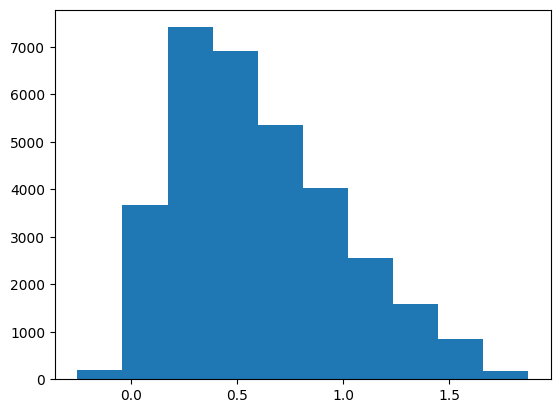

In [10]:
plt.hist(c)